In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

EV = pd.read_csv("EVIO_history_01-06-2022_31-05-2023.csv", sep=';')

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Cost incl. IVA'] = EV['Cost incl. IVA'].str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')

cost = EV['Cost incl. IVA']
energy = EV['Total Energy (kWh)']
duration = EV['Duration (min)']
EV['Day of Week'] = EV['Start date'].dt.day_name()
EV['Month'] = EV['Start date'].dt.month_name()

# Criar colunas separadas para hora e minuto
EV['start_hour'] = EV['Start date'].dt.hour
EV['start_minute'] = EV['Start date'].dt.minute

print(EV)
print(EV['Total Energy (kWh)'].mean())

26.284786324786317


Capacidade: 55.51


Text(0, 0.5, 'Potencia Média (kW)')

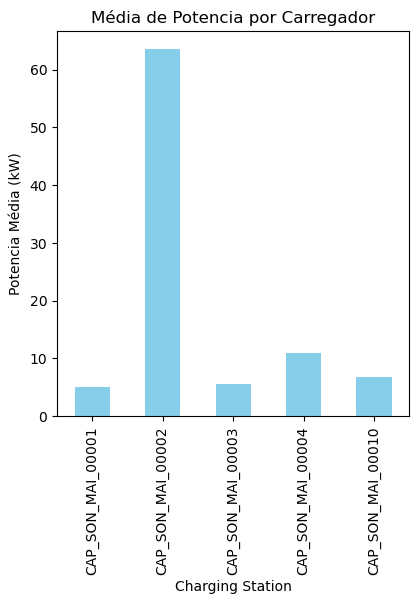

In [4]:
#Obter capacidade
Capacidade = EV['Total Energy (kWh)'].max()
print("Capacidade:" , Capacidade)

#Obter potencia média dos carregadores
a = (EV.groupby('Charging Station')['Duration (min)'].mean())
b = (EV.groupby('Charging Station')['Total Energy (kWh)'].mean())
C = (b/(a/60))

# Plot da média de duração
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
C.plot(kind='bar', color='skyblue')
plt.title('Média de Potencia por Carregador')
plt.xlabel('Charging Station')
plt.ylabel('Potencia Média (kW)')

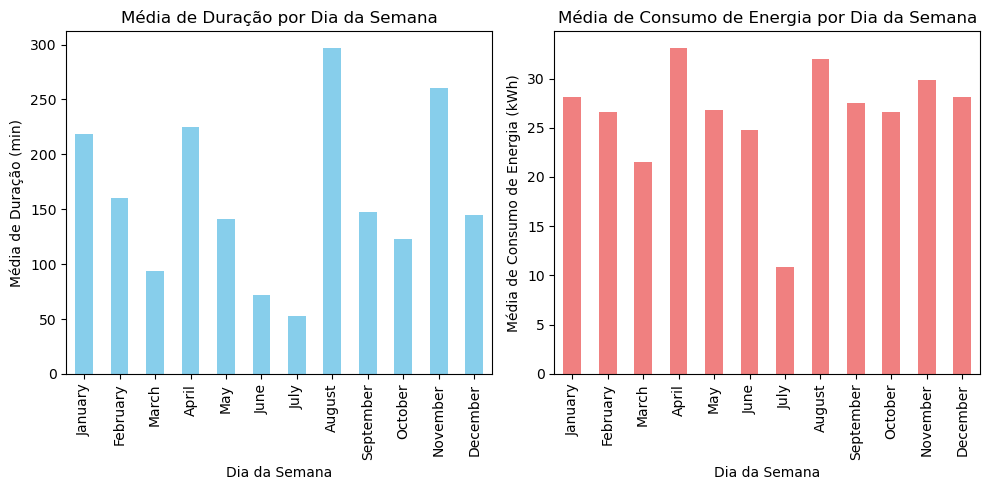

In [9]:
# Calcular a média da duração para cada dia da semana
avg_duration = EV.groupby('Month')['Duration (min)'].mean()
avg_Energy = EV.groupby('Month')['Total Energy (kWh)'].mean()

# Reorganizar os índices para iniciar a partir de segunda-feira
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
avg_duration = avg_duration.reindex(new_order)
avg_Energy = avg_Energy.reindex(new_order)


# Plot da média de duração
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
avg_duration.plot(kind='bar', color='skyblue')
plt.title('Média de Duração por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Duração (min)')

# Plot da média de consumo de energia total
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
avg_Energy.plot(kind='bar', color='lightcoral')
plt.title('Média de Consumo de Energia por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Consumo de Energia (kWh)')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

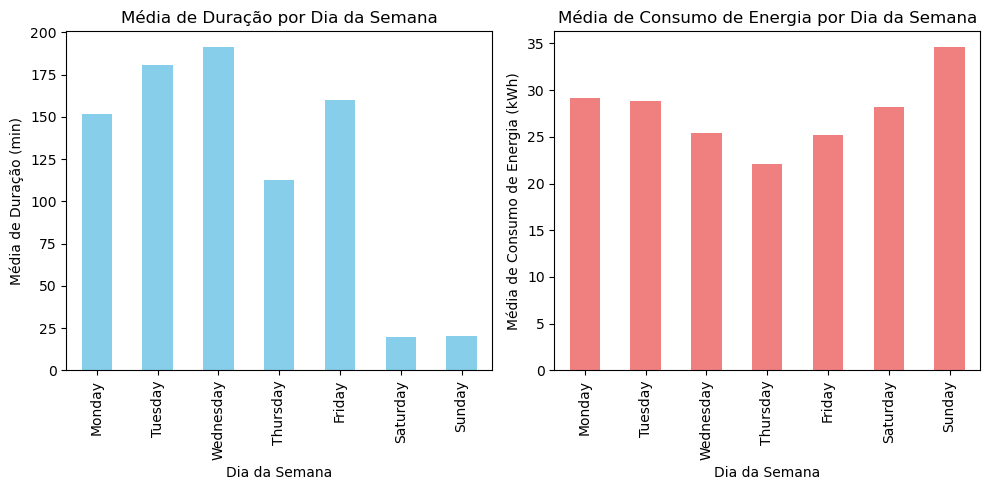

In [10]:
# Calcular a média da duração para cada dia da semana
avg_duration = EV.groupby('Day of Week')['Duration (min)'].mean()
avg_Energy = EV.groupby('Day of Week')['Total Energy (kWh)'].mean()

# Reorganizar os índices para iniciar a partir de segunda-feira
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_duration = avg_duration.reindex(new_order)
avg_Energy = avg_Energy.reindex(new_order)


# Plot da média de duração
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
avg_duration.plot(kind='bar', color='skyblue')
plt.title('Média de Duração por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Duração (min)')

# Plot da média de consumo de energia total
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
avg_Energy.plot(kind='bar', color='lightcoral')
plt.title('Média de Consumo de Energia por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Consumo de Energia (kWh)')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

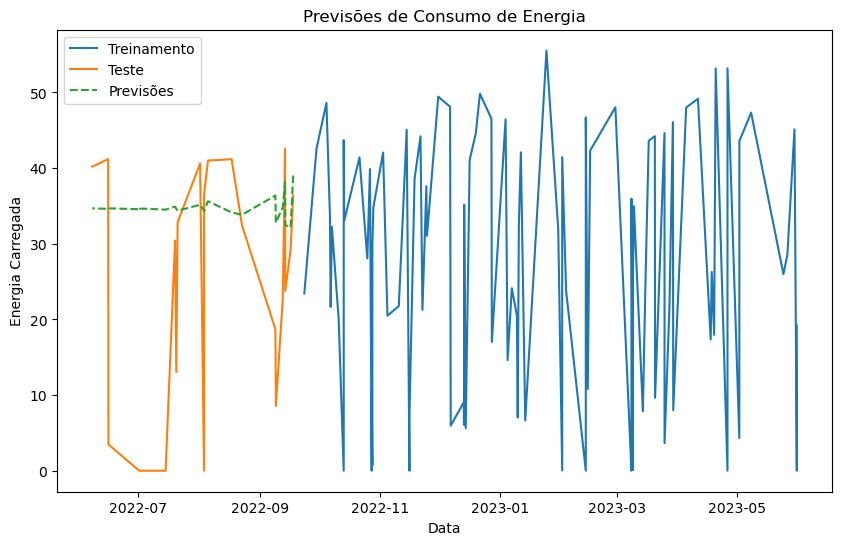

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
# Definindo a coluna de data como índice
EV.set_index('Start date', inplace=True)

# Dividindo os dados em conjunto de treinamento e teste
train_size = int(len(EV) * 0.8)
train_size = int(len(EV))
#train, test = EV[:train_size], EV[train_size:]


# Treinando o modelo ARIMA
model = ARIMA(train['Total Energy (kWh)'], order=(5, 1, 0))  # Ajuste a ordem conforme necessário
model_fit = model.fit()

# Fazendo previsões no conjunto de teste
predictions = model_fit.forecast(steps=len(test))

# Plotando as previsões
plt.figure(figsize=(10, 6))
plt.plot(train['Total Energy (kWh)'], label='Treinamento')
plt.plot(test['Total Energy (kWh)'], label='Teste')
plt.plot(test.index, predictions, label='Previsões', linestyle='dashed')
plt.title('Previsões de Consumo de Energia')
plt.xlabel('Data')
plt.ylabel('Energia Carregada')
plt.legend()
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

y = EV['Total Energy (kWh)']
Z = EV['Duration (min)']

# Agrupamento por dia da semana e agregação
group_EV = EV.groupby('Day of Week')['Duration (min)'].mean().reset_index()

predictions_by_day = {}

# Treinando e fazendo previsões para cada dia da semana
for day in group_EV['Day of Week']:
    # Filtrando os dados para o dia específico
    day_data = group_EV[group_EV['Day of Week'] == day]['Duration (min)']
    
    # Dividindo os dados em conjunto de treinamento e teste
    train_size = int(len(day_data) * 0.8)
    train, test = day_data[:train_size], day_data[train_size:]

    # Treinando o modelo ARIMA
    model = ARIMA(train, order=(20,1,0))  # Ajuste a ordem conforme necessário
    model_fit = model.fit()

    # Fazendo previsões no conjunto de teste
    predictions = model_fit.forecast(steps=len(test))
    
     # Armazenando as previsões no dicionário
    predictions_by_day[day] = predictions

    # Avaliando o desempenho do modelo (RMSE)
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'RMSE para {day}: {rmse}')

# Visualizando as previsões para cada dia da semana
plt.figure(figsize=(12, 8))

for day, predictions in predictions_by_day.items():
    plt.plot(predictions, label=f'Previsões para {day}')

plt.title('Previsões de Energia para Cada Dia da Semana')
plt.xlabel('Período de Teste')
plt.ylabel('Energia Carregada')
plt.legend()
plt.show() 

C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\miguel.preto\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\miguel.preto\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\miguel.preto\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\miguel.preto\Anaconda3\lib\site-packages\statsmodels\base\model.py:531: RuntimeWarning: invalid value enc

LinAlgError: Schur decomposition solver error.

  Day of Week Start Time Endtime  Average Duration  Average Power
0      Friday      08:27   11:06        159.994059       9.462925
1      Monday      08:23   10:54        151.898059      11.518484
2    Saturday      08:24   08:43         19.922333      84.990045
3      Sunday      09:10   09:30         20.167000     102.821441
4    Thursday      08:15   10:07        112.656286      11.764482
5     Tuesday      08:07   11:07        180.869259       9.577698
6   Wednesday      13:11   16:22        191.112968       7.980316


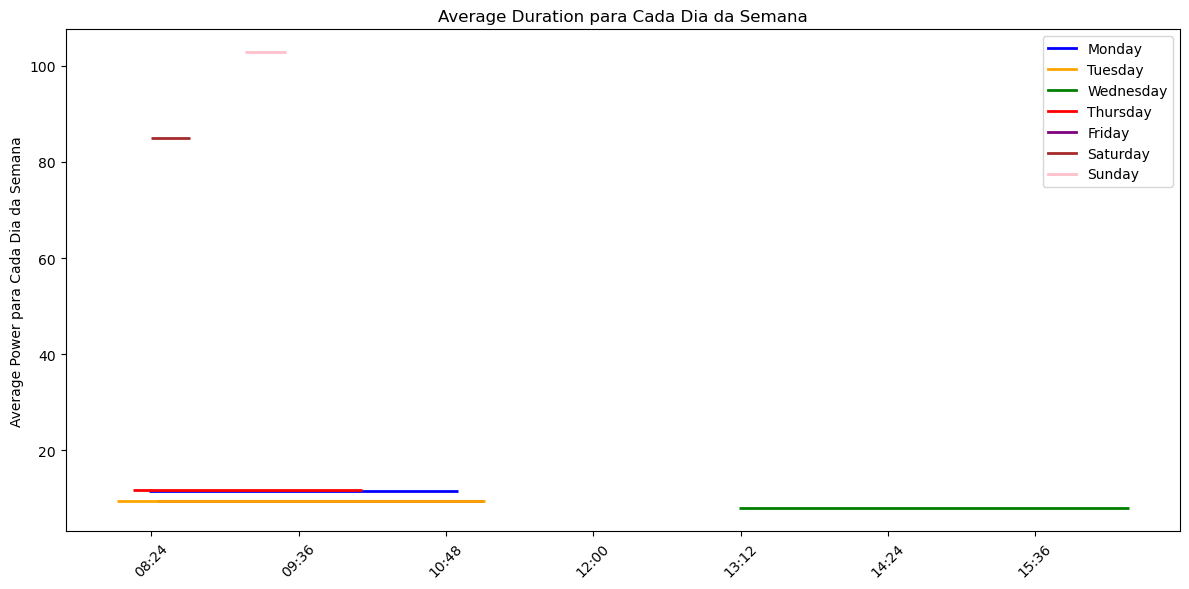

In [55]:
#Obter potencia média dos carregadores para cada dia da semana
a = (EV.groupby('Day of Week')['Duration (min)'].mean())
b = (EV.groupby('Day of Week')['Total Energy (kWh)'].mean())
Avergae_Power = (b/(a/60))

# Agrupar por dia da semana e hora/minuto
grouped = EV.groupby(['Day of Week', 'start_hour', 'start_minute'])

# Contar as ocorrências de cada hora/minuto para cada dia da semana
counts = grouped.size().reset_index(name='count')

# Encontrar o máximo para cada dia da semana
idx = counts.groupby('Day of Week')['count'].idxmax()
result = counts.loc[idx].reset_index()

result['Start Time'] = result['start_hour'].astype(str).str.zfill(2) + ':' + result['start_minute'].astype(str).str.zfill(2)

#result['New Column'] = result.apply(lambda row: EV.loc[(EV['Day of Week'] == row['Day of Week']) & (EV['start_hour'] == row['start_hour']) & (EV['start_minute'] == row['start_minute']), 'Start date'].iloc[0] + pd.Timedelta(minutes=avg_duration[row['Day of Week']]), axis=1)
result['Endtime'] = result.apply(lambda row: (EV.loc[(EV['Day of Week'] == row['Day of Week']) & (EV['start_hour'] == row['start_hour']) & (EV['start_minute'] == row['start_minute']), 'Start date'].iloc[0] + pd.Timedelta(minutes=avg_duration[row['Day of Week']])).strftime('%H:%M'), axis=1)

# Adicionar coluna da duração média
result['Average Duration'] = result.apply(lambda row: avg_duration[row['Day of Week']], axis=1)
result['Average Power'] = result.apply(lambda row: Avergae_Power[row['Day of Week']], axis=1)

# Exibir os resultados
print(result[['Day of Week', 'Start Time', 'Endtime', 'Average Duration', 'Average Power']])


# Ordenar o DataFrame por 'Day of Week', 'start_hour', 'start_minute' para garantir a ordem correta no gráfico
result = result.sort_values(['Day of Week', 'start_hour', 'start_minute'])

# Converter 'Start Time' e 'Endtime' para o tipo de dados datetime
result['Start Time'] = pd.to_datetime(result['Start Time'])
result['Endtime'] = pd.to_datetime(result['Endtime'])

# Configurar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criar um mapeamento de cores para cada dia da semana
colors = {'Monday': 'blue', 'Tuesday': 'orange', 'Wednesday': 'green', 'Thursday': 'red', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'pink'}

# Iterar sobre os intervalos de tempo
for _, row in result.iterrows():
    start_time = mdates.date2num(row['Start Time'])
    end_time = mdates.date2num(row['Endtime'])
    day_color = colors.get(row['Day of Week'], 'gray')  # Se o dia não estiver mapeado, use a cor cinza
    ax.hlines(y=row['Average Power'], xmin=start_time, xmax=end_time, color= day_color, linewidth=2)

# Adicionar rótulos e título
ax.set_xlabel('')
ax.set_ylabel('Average Power para Cada Dia da Semana')
ax.set_title('Average Duration para Cada Dia da Semana')

# Configurar o formato do eixo x para mostrar horas e minutos
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Girar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Criar legendas
legend_labels = [plt.Line2D([0], [0], color=color, linewidth=2) for color in colors.values()]
ax.legend(legend_labels, colors.keys())


# Exibir o gráfico
plt.tight_layout()
plt.show()